In [1]:
import matplotlib.pyplot as plt
import math

In [2]:
from utils.data_initial import *
from utils.data_generated import *
from utils.data_processing import *

## Movie Genres

### CMU dataset

In [3]:
df_movie_md = load_cmu_movie_metadata()

In [4]:
print("There are {} movies in our database.".format(len(df_movie_md)))

There are 81741 movies in our database.


In [5]:
genres = df_movie_md.genres.dropna()

In [6]:
print("Amongst those, {} have their genre specified.".format(len(genres)))

Amongst those, 81741 have their genre specified.


In [7]:
data = [item for sublist in genres for item in sublist]
all_genres = pd.DataFrame(data, columns=['genre'])

In [8]:
n_genres = len(all_genres.genre.unique())

print("There are {} different genres.".format(n_genres))

There are 363 different genres.


In [9]:
all_genres_vcount = pd.DataFrame(all_genres.value_counts())
all_genres_vcount.columns = ['occurences']

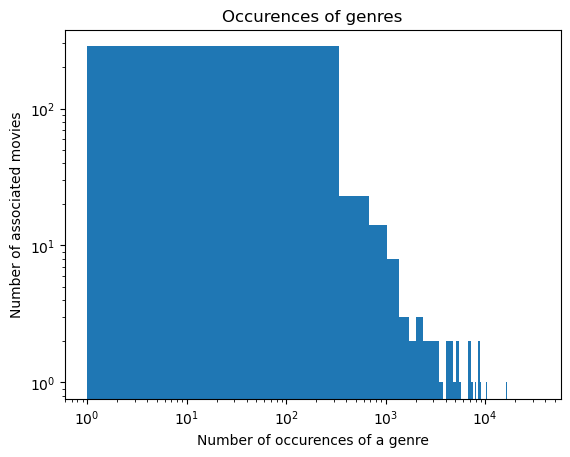

In [10]:
plt.hist(all_genres.value_counts(), bins=100)
plt.xscale('log')
plt.yscale('log')
plt.title("Occurences of genres")
plt.xlabel('Number of occurences of a genre')
plt.ylabel('Number of associated movies')
plt.show()

Most genres occur less than 100 times in our dataset.

In [11]:
all_genres_vcount.describe()

,occurences
count,363.000000
mean,670.327824
std,2424.819001
min,1.000000
25%,13.000000
50%,65.000000
75%,283.500000
max,34007.000000


In [12]:
n_m10 = len(all_genres_vcount[all_genres_vcount.occurences > 10])
n_m100 = len(all_genres_vcount[all_genres_vcount.occurences > 100])
print("If we only keep those occuring more than 10 times we would have {} left, and for more than 100 times {} left.".format(n_m10, n_m100))

If we only keep those occuring more than 10 times we would have 276 left, and for more than 100 times 151 left.


Some genres occuring at most 10 times are:

In [13]:
all_genres_vcount[all_genres_vcount.occurences < 10].sample(10)

,occurences
genre,
Bloopers & Candid Camera,6
Operetta,5
Private military company,2
Tokusatsu,4
Werewolf fiction,4
Courtroom Comedy,6
Czechoslovak New Wave,9
Neorealism,1
Z movie,3


The 15 most occuring genres are:

In [14]:
all_genres_vcount.head(15)

,occurences
genre,
Drama,34007
Comedy,16349
Romance Film,10234
Black-and-white,9094
Action,8798
Thriller,8744
Short Film,8141
World cinema,7155
Crime Fiction,6948


### Through time

In [15]:
genres_by_year = df_movie_md[['release_date', 'genres']]

In [16]:
genres_by_year.release_date = genres_by_year.release_date.apply(lambda d: d.year)
genres_by_year = genres_by_year.explode('genres').groupby('genres').apply(lambda g: g.release_date.value_counts().sort_index())

/tmp/ipykernel_127887/3084723802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_by_year.release_date = genres_by_year.release_date.apply(lambda d: d.year)


In [17]:
top_genres = [g[0] for g in list(all_genres_vcount.iloc[:5].index)]

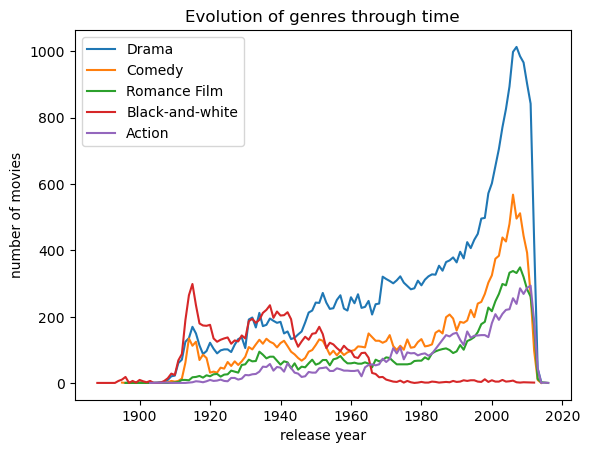

In [18]:
for genre in top_genres:
    genres_by_year[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies')
plt.legend()
plt.show()

As we can see above, even in a basic plot we can see a clear difference in distribution of genre releases.

We try to normalize by the number of releases in each year.

In [19]:
releases_per_year = df_movie_md.release_date.apply(lambda d: d.year).value_counts()

In [20]:
genres_by_year_normalized = genres_by_year.copy()
genres_by_year_normalized.index.set_names(['genre', 'year'], inplace=True)
genres_by_year_normalized = genres_by_year_normalized.divide(releases_per_year, level=1)

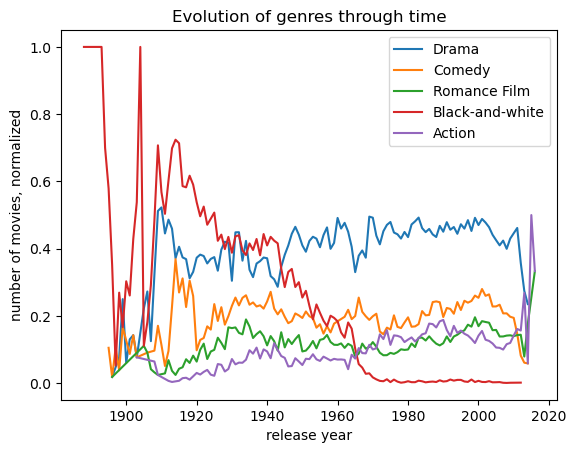

In [21]:
for genre in top_genres:
    genres_by_year_normalized[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

### We now consider the imdb dataset

In [22]:
df_imdb = load_imdb_title_basics()

In [23]:
print("There are {} unique movies etc in our database.".format(len(df_imdb.title_id.unique())))

There are 9339873 unique movies etc in our database.


In [24]:
df_imdb = df_imdb[df_imdb.type == 'movie']

In [25]:
print("{} amongst them are classified as movies...".format(len(df_imdb.title_id.unique())))

625933 amongst them are classified as movies...


In [26]:
df_imdb = df_imdb[df_imdb.genres.notnull()]

In [27]:
print("... and {} amongst them have their genres specified.".format(len(df_imdb.title_id.unique())))

... and 553916 amongst them have their genres specified.


In [28]:
data = [item for sublist in df_imdb.genres for item in sublist]
imdb_all_genres = pd.DataFrame(data, columns=['genre'])

print("The imdb movies dataset contains {} different genres.".format(len(imdb_all_genres.genre.unique())))

The imdb movies dataset contains 28 different genres.


We see that the imdb dataset has a fraction of the genres of the cmu dataset.

In [29]:
imdb_genres_vcount = pd.DataFrame(imdb_all_genres.value_counts())
imdb_genres_vcount.columns = ['occurences']

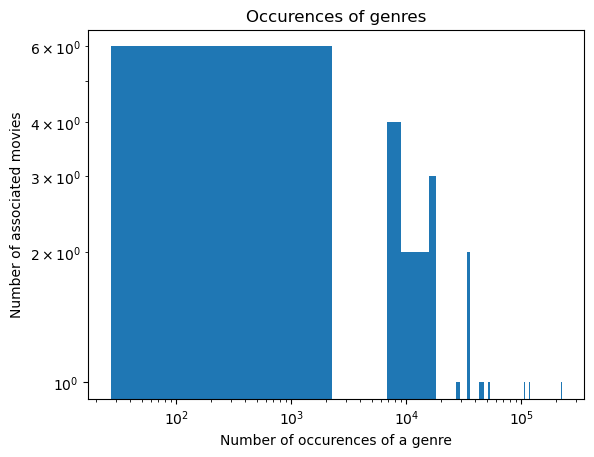

In [30]:
plt.hist(imdb_genres_vcount, bins=100)
plt.xscale('log')
plt.yscale('log')
plt.title("Occurences of genres")
plt.xlabel('Number of occurences of a genre')
plt.ylabel('Number of associated movies')
plt.show()

Due to the small amount of different genres, they all occur very often.

In [31]:
imdb_genres_vcount.describe()

,occurences
count,28.000000
mean,30220.892857
std,47928.299691
min,27.000000
25%,7775.500000
50%,13606.500000
75%,35439.500000
max,225089.000000


In [32]:
imdb_genres_vcount.head(15)

,occurences
genre,
Drama,225089
Documentary,117133
Comedy,106000
Action,52290
Romance,45911
Thriller,42866
Crime,35852
Horror,35302
Adventure,27319


### Through time

In [33]:
imdb_genres_by_year = df_imdb[['start_year', 'genres']]

In [34]:
imdb_genres_by_year = imdb_genres_by_year.explode('genres').groupby('genres').apply(lambda g: g.start_year.value_counts().sort_index())

In [35]:
top_genres = [g[0] for g in list(imdb_genres_vcount.iloc[:5].index)]

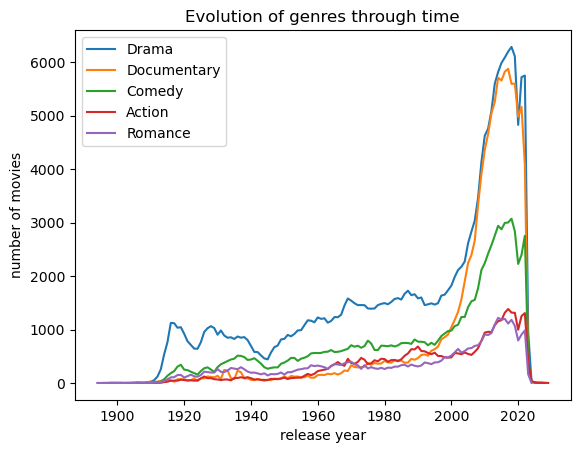

In [36]:
for genre in top_genres:
    imdb_genres_by_year[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies')
plt.legend()
plt.show()

There is a difference of evolution of genres visible, as for the cmu dataset.

We also try to normalize by the number of releases in each year.

In [37]:
releases_per_year = df_imdb.start_year.value_counts()

In [38]:
imdb_genres_by_year_normalized = imdb_genres_by_year.copy()
imdb_genres_by_year_normalized.index.set_names(['genre', 'year'], inplace=True)
imdb_genres_by_year_normalized = imdb_genres_by_year_normalized.divide(releases_per_year, level=1)

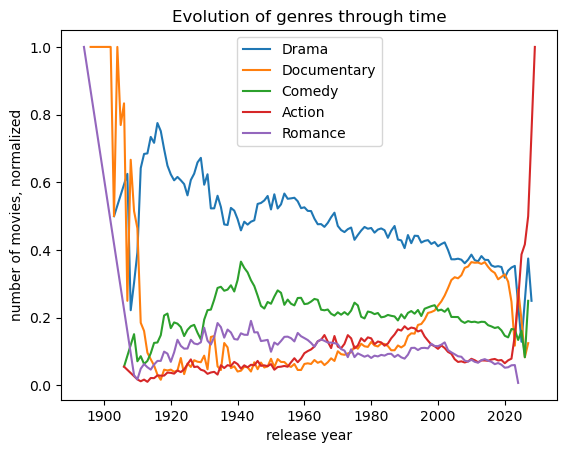

In [39]:
for genre in top_genres:
    imdb_genres_by_year_normalized[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

### Use combined data to be able to include other metrics

In [40]:
movie_data = load_movie_metadata()

In [41]:
data = [item for sublist in movie_data.genres_cmu for item in sublist]
genres = pd.DataFrame(data, columns=['genre'])

In [42]:
genres_vcount = pd.DataFrame(genres.value_counts())
genres_vcount.columns = ['occurences']

In [43]:
genres_vcount.describe()

,occurences
count,352.000000
mean,403.980114
std,1476.583613
min,1.000000
25%,9.000000
50%,47.000000
75%,170.000000
max,20881.000000


After combining cmu and imdb datasets we lost 11 genres and droped the other values.

In [44]:
genres_by_year = movie_data[['release_date', 'genres_cmu']]
genres_by_year.release_date = genres_by_year.release_date.apply(lambda d: d.year)
genres_by_year = genres_by_year.explode('genres_cmu').groupby('genres_cmu').apply(lambda g: g.release_date.value_counts().sort_index())

/tmp/ipykernel_127887/2925293794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_by_year.release_date = genres_by_year.release_date.apply(lambda d: d.year)


In [45]:
top_genres = [g[0] for g in list(genres_vcount.iloc[:5].index)]

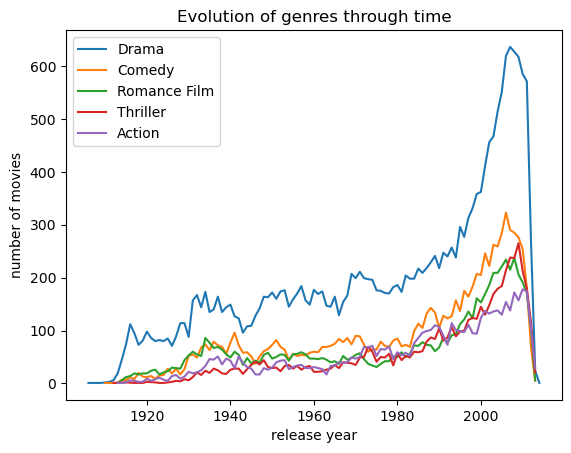

In [46]:
for genre in top_genres:
    genres_by_year[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies')
plt.legend()
plt.show()

We see that there are less Black-and-white movies in our combined data, this is probably due to the fact that they are older movies and data about them is hence not as good.

In [47]:
releases_per_year = movie_data.release_date.apply(lambda d: d.year).value_counts()

In [48]:
genres_by_year_normalized = genres_by_year.copy()
genres_by_year_normalized.index.set_names(['genre', 'year'], inplace=True)
genres_by_year_normalized = genres_by_year_normalized.divide(releases_per_year, level=1)

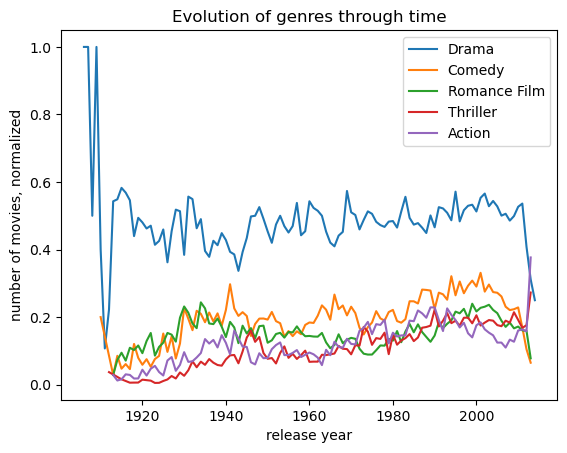

In [49]:
for genre in top_genres:
    genres_by_year_normalized[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

We drop all movies before 1915 and after 2011, because we are clearly missing some of them.

<AxesSubplot:>

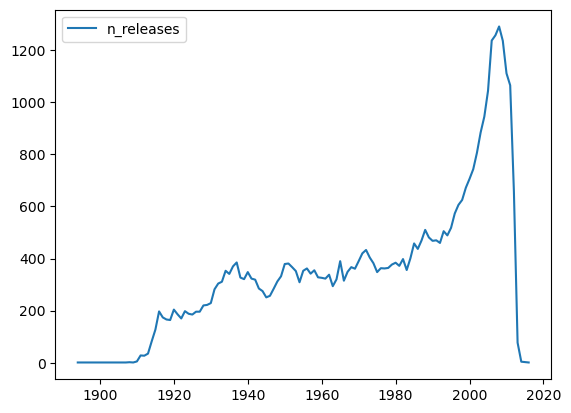

In [50]:
pd.DataFrame(releases_per_year).rename({'release_date': 'n_releases'}, axis='columns').sort_index(ascending=True).plot(label='n_releases')

In [51]:
pd.DataFrame(releases_per_year).sort_index(ascending=True).head(20)

,release_date
1894,1
1906,1
1907,1
1908,2
1909,1
1910,5
1911,28
1912,27
1913,35
1914,82


In [52]:
pd.DataFrame(releases_per_year).sort_index(ascending=False).head(20)

,release_date
2016,1
2014,4
2013,77
2012,659
2011,1065
2010,1111
2009,1236
2008,1291
2007,1257
2006,1237


In [53]:
genres_by_year_normalized_cut = genres_by_year_normalized[(genres_by_year_normalized.index.get_level_values(1) >= 1915) & (genres_by_year_normalized.index.get_level_values(1) <= 2011)]

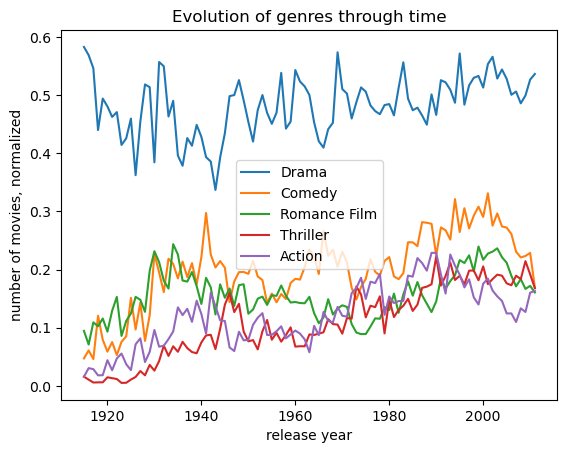

In [54]:
for genre in top_genres:
    genres_by_year_normalized_cut[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

Let's try taking into account popularity. To that end we use the number of votes on imdb

In [55]:
imdb_votes = load_imdb_title_rating()

In [56]:
movie_data_ext = movie_data.merge(imdb_votes, how='left', left_on='title_id_imdb', right_on='title_id')

In [57]:
# drop rows with missing votes
movie_data_ext = movie_data_ext.dropna(subset=['num_votes'])

In [58]:
movie_data_ext.release_date = movie_data_ext.release_date.apply(lambda d: d.year)

In [59]:
# drop years w/ bad data
movie_data_ext = movie_data_ext[movie_data_ext.release_date >= 1915]
movie_data_ext = movie_data_ext[movie_data_ext.release_date <= 2011]

In [60]:
# group by year, sorted by number of votes
movie_data_ext_by_year = movie_data_ext.sort_values(['num_votes'], ascending=False).groupby('release_date')

In [61]:
# compute how many movies represents 10% of releases in each year
n_movies_per_year_10p = movie_data_ext_by_year.agg('count').movie_id_wikipedia.apply(lambda c: math.ceil(c/10))

In [62]:
# build Dataframe with top 10 percent most popular movies per year
new_data = []
for idx, rows in movie_data_ext_by_year:
    n_votes_cutoff = rows.iloc[n_movies_per_year_10p[idx]].num_votes
    d = rows.drop(rows[rows.num_votes < n_votes_cutoff].index).genres_cmu
    new_data += [(idx, v) for v in d.values]

In [63]:
top_movies_genres_by_year = pd.DataFrame(new_data, columns=['year', 'genre']).explode('genre')
top_movies_genres_by_year = top_movies_genres_by_year.groupby('genre').apply(lambda g: g.year.value_counts()).sort_index()
top_movies_genres_by_year = top_movies_genres_by_year.divide(n_movies_per_year_10p, level=1)

In [64]:
top_genres = [g[0] for g in list(genres_vcount.iloc[:5].index)]

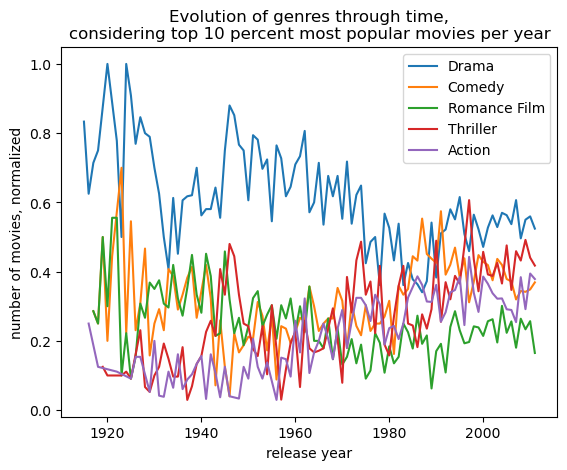

In [65]:
for genre in top_genres:
    top_movies_genres_by_year[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time,\nconsidering top 10 percent most popular movies per year')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

Let's narrow it down to more recent movies

In [66]:
top_movies_genres_by_year_cut = top_movies_genres_by_year[top_movies_genres_by_year.index.get_level_values(1) >= 1980]

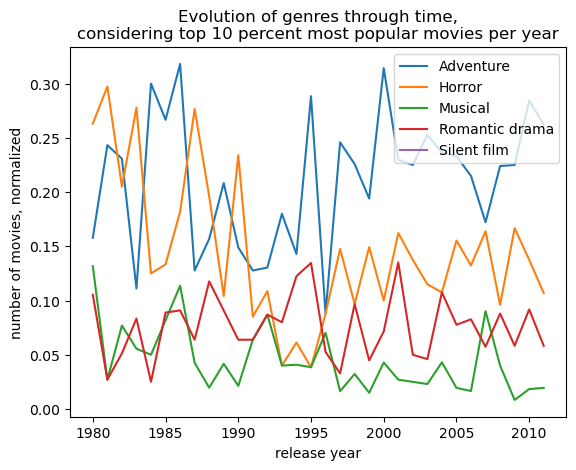

In [67]:
top_genres = [g[0] for g in list(genres_vcount.iloc[10:15].index)]

for genre in top_genres:
    top_movies_genres_by_year_cut[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time,\nconsidering top 10 percent most popular movies per year')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

Let's now look into popularity based on rating instead of votes

In [68]:
movie_data_ext = movie_data.merge(imdb_votes, how='left', left_on='title_id_imdb', right_on='title_id')

# drop rows with missing rating
movie_data_ext = movie_data_ext.dropna(subset=['average_rating'])

movie_data_ext.release_date = movie_data_ext.release_date.apply(lambda d: d.year)

# drop years w/ bad data
movie_data_ext = movie_data_ext[movie_data_ext.release_date >= 1915]
movie_data_ext = movie_data_ext[movie_data_ext.release_date <= 2011]

# group by year, sorted by rating
movie_data_ext_by_year = movie_data_ext.sort_values(['average_rating'], ascending=False).groupby('release_date')

# compute how many movies represents 10% of releases in each year
n_movies_per_year_10p = movie_data_ext_by_year.agg('count').movie_id_wikipedia.apply(lambda c: math.ceil(c/10))

# build Dataframe with top 10 percent most popular movies per year
new_data = []
for idx, rows in movie_data_ext_by_year:
    rating_cutoff = rows.iloc[n_movies_per_year_10p[idx]].average_rating
    d = rows.drop(rows[rows.average_rating < rating_cutoff].index).genres_cmu
    new_data += [(idx, v) for v in d.values]

top_movies_genres_by_year = pd.DataFrame(new_data, columns=['year', 'genre']).explode('genre')
top_movies_genres_by_year = top_movies_genres_by_year.groupby('genre').apply(lambda g: g.year.value_counts()).sort_index()
top_movies_genres_by_year = top_movies_genres_by_year.divide(n_movies_per_year_10p, level=1)

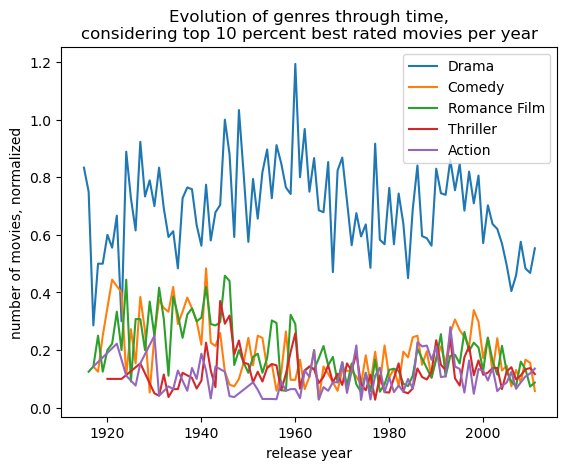

In [69]:
top_genres = [g[0] for g in list(genres_vcount.iloc[:5].index)]

for genre in top_genres:
    top_movies_genres_by_year[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time,\nconsidering top 10 percent best rated movies per year')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

Finally, look into box office revenue

In [70]:
# drop rows with missing revenue
movie_data_rev = movie_data.dropna(subset=['box_office_revenue'])

movie_data_rev.release_date = movie_data_rev.release_date.apply(lambda d: d.year)

# drop years w/ bad data
movie_data_rev = movie_data_rev[movie_data_rev.release_date >= 1915]
movie_data_rev = movie_data_rev[movie_data_rev.release_date <= 2011]

# group by year, sorted by revenue
movie_data_rev_by_year = movie_data_rev.sort_values(['box_office_revenue'], ascending=False).groupby('release_date')

# compute how many movies represents 10% of releases in each year
n_movies_per_year_10p = movie_data_rev_by_year.agg('count').movie_id_wikipedia.apply(lambda c: math.ceil(c/10))

# build Dataframe with top 10 percent most grossing movies per year
new_data = []
for idx, rows in movie_data_rev_by_year:
    revenue_cutoff = rows.iloc[n_movies_per_year_10p[idx]-1].box_office_revenue
    d = rows.drop(rows[rows.box_office_revenue < revenue_cutoff].index).genres_cmu
    new_data += [(idx, v) for v in d.values]

top_movies_genres_by_year = pd.DataFrame(new_data, columns=['year', 'genre']).explode('genre')
top_movies_genres_by_year = top_movies_genres_by_year.groupby('genre').apply(lambda g: g.year.value_counts()).sort_index()
top_movies_genres_by_year = top_movies_genres_by_year.divide(n_movies_per_year_10p, level=1)

/tmp/ipykernel_127887/1471386330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data_rev.release_date = movie_data_rev.release_date.apply(lambda d: d.year)


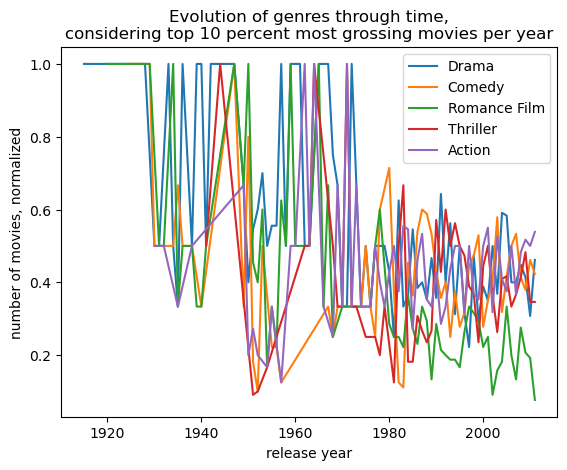

In [71]:
top_genres = [g[0] for g in list(genres_vcount.iloc[:5].index)]

for genre in top_genres:
    top_movies_genres_by_year[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time,\nconsidering top 10 percent most grossing movies per year')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

Narrow it down to more recent movies, because we are clearly missing revenue data before 1980.

In [72]:
top_movies_genres_by_year_cut = top_movies_genres_by_year[top_movies_genres_by_year.index.get_level_values(1) >= 1980]

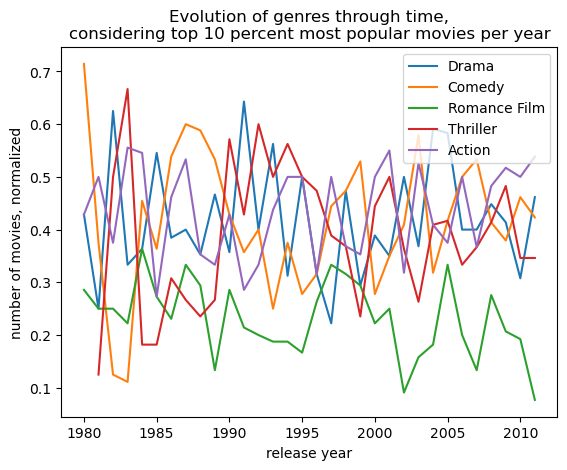

In [73]:
for genre in top_genres:
    top_movies_genres_by_year_cut[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time,\nconsidering top 10 percent most popular movies per year')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()